In [22]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
# Set the style for our plots to make them look nice
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (18, 8)
plt.rcParams["font.size"] = 12

# Define the path to your analysis file
# The filename is the one you provided.
file_path = "outputs/analysis_Phi-4-reasoning_20250618_111134.json"

print(f"Ready to analyze file: {file_path}")

Ready to analyze file: outputs/analysis_Phi-4-reasoning_20250618_111134.json


In [23]:
# Load the JSON data into a pandas DataFrame for easy manipulation

try:
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Convert the list of dictionaries directly into a DataFrame
    df = pd.DataFrame(data)
    avg_variance = df['variance'].mean()
    
    print("File loaded successfully!")
    print(f"Total number of generated tokens: {len(df)}")
    print(f"Average variance: {avg_variance:.2e}")
    
    
    # Display the first few rows to verify the structure
    print("\nData Head:")
    display(df.head())
    
    # Display summary information about the DataFrame
    print("\nData Info:")
    df.info()

except FileNotFoundError:
    print(f"ERROR: The file was not found at {file_path}")
    print("Please make sure the filename and path are correct.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully!
Total number of generated tokens: 23676
Average variance: 7.97e-06

Data Head:


,step,chosen_token,chosen_token_prob,variance,top_k_predictions
0,1,<think>,1.000000,0.000010,"[{'token': '<think>', 'probability': 1.0}, {'t..."
1,2,We,1.000000,0.000010,"[{'token': 'We', 'probability': 1.0}, {'token'..."
2,3,are,1.000000,0.000010,"[{'token': ' are', 'probability': 1.0}, {'toke..."
3,4,given,0.679688,0.000005,"[{'token': ' given', 'probability': 0.6796875}..."
4,5,a,0.832031,0.000007,"[{'token': ' a', 'probability': 0.83203125}, {..."



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23676 entries, 0 to 23675
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   step               23676 non-null  int64  
 1   chosen_token       23676 non-null  object 
 2   chosen_token_prob  23676 non-null  float64
 3   variance           23676 non-null  float64
 4   top_k_predictions  23676 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 925.0+ KB


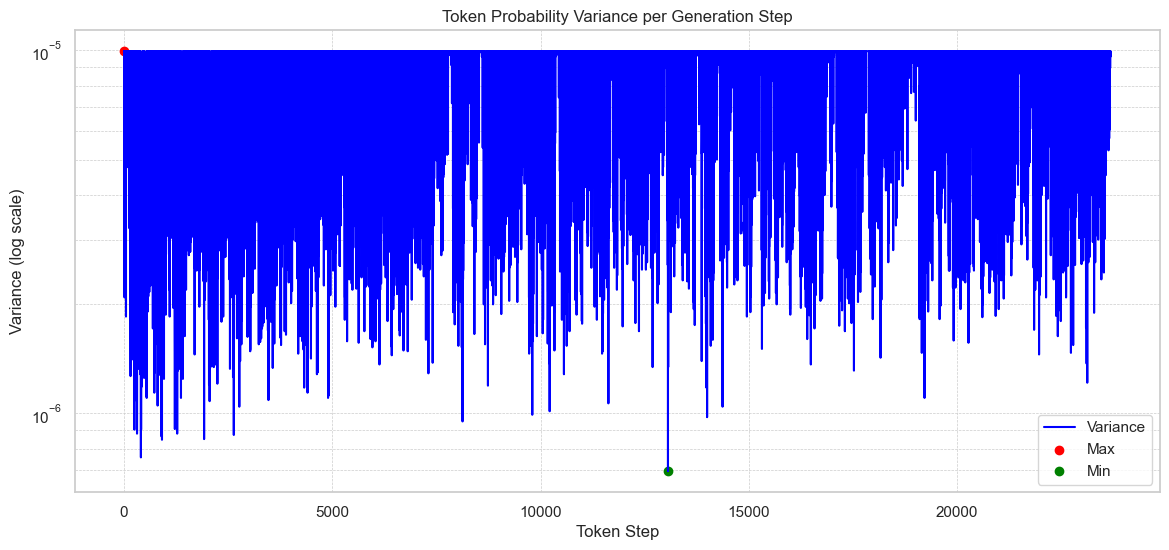

In [24]:
if 'df' in locals() and not df.empty:
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['variance'], label='Variance', color='blue')
    plt.yscale('log')
    plt.xlabel('Token Step')
    plt.ylabel('Variance (log scale)')
    plt.title('Token Probability Variance per Generation Step')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Highlight max and min variance points
    max_idx = df['variance'].idxmax()
    min_idx = df['variance'].idxmin()
    plt.scatter([max_idx], [df.loc[max_idx, 'variance']], color='red', label='Max')
    plt.scatter([min_idx], [df.loc[min_idx, 'variance']], color='green', label='Min')
    plt.legend()
    plt.show()
else:
    print("DataFrame 'df' not available.")

In [26]:
# Show the 1st, 5th, and 40th percentile (lowest) variance values in scientific notation

if 'df' in locals() and not df.empty:
    percentiles = [0.01, 0.05, 0.40]
    percentile_labels = ['1st', '5th', '40th']
    values = df['variance'].quantile(percentiles)
    
    print("Variance percentiles (lowest):")
    for label, val in zip(percentile_labels, values):
        print(f"{label} percentile: {val:.2e}")
else:
    print("DataFrame 'df' not available. Please run the previous cell successfully.")

Variance percentiles (lowest):
1st percentile: 1.80e-06
5th percentile: 2.89e-06
40th percentile: 8.58e-06


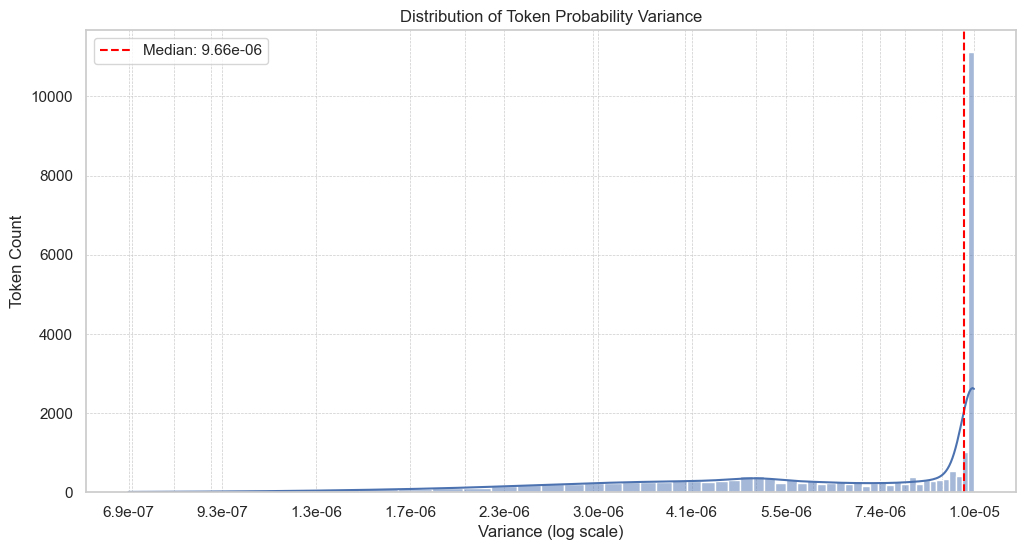

In [34]:
import numpy as np

if 'df' in locals() and not df.empty:
    plt.figure(figsize=(12, 6))
    sns.histplot(df['variance'], bins=50, kde=True)
    plt.xscale('log')
    plt.xlabel('Variance (log scale)')
    plt.ylabel('Token Count')
    plt.title('Distribution of Token Probability Variance')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Add more ticks on the log x-axis
    min_var = df['variance'].min()
    max_var = df['variance'].max()
    ticks = np.logspace(np.log10(min_var), np.log10(max_var), num=10)
    plt.xticks(ticks, [f"{t:.1e}" for t in ticks])
    
    # Add median line
    median_var = df['variance'].median()
    plt.axvline(median_var, color='red', linestyle='--', label=f"Median: {median_var:.2e}")
    plt.legend()
    plt.show()
else:
    print("DataFrame 'df' not available.")